## HW-04：Notes and comments 

- 连玉君，`2025/10/31 17:19`  

完成作业过程中，请注意如下问题：

- **基本设定**。在 `.ipynb` 文件开头部分，新增 1-2 个代码块，用于设定工作目录、安装外部命令，显示包的版本信息等。
  - 使用 `global path "xxx"` 设定根路径
  - 后续代码中，使用相对路径引用数据文件，如 `"$path/data/xxx.csv"`。
- **代码格式**。
  - 请注意代码的可读性，适当添加注释，避免过长的代码行。
  - 缩进：建议使用 4 个空格，避免使用 Tab 键。
- **图形输出**。
  - 图形的美观度：标题、坐标轴标签等请使用中文。
  - 图例：确保图例不遮挡数据点，必要时可调整位置或将图例放置在图形下方。
  - 图形保存：请将图形保存为 `.png` 格式，分辨率建议设置为 300 dpi 以上。可以使用 `graph export xxx.png, replace width(800)` 命令保存图形。
- **文字解读**。
  - 背景介绍和结果解读，尽量使用规范的学术语言，要把细节写清楚 (你可以自己写个初稿或提纲，然后让 AI 帮你润色、完善)。
  - 涉及数学公式的部分，务必使用 LaTeX 语法进行排版。

以下我写的一些例子，供参考：

In [ ]:
*-依赖包：酌情安装
clear all
program drop _all 

ssc install cleanplots, replace  // 安装 cleanplots 图形模板（如已安装可跳过此步）
ssc install scheme_scientific, replace   // 安装 scientific 科学计数法格式包（如已安装可跳过此步）
ssc install estout, replace      // 安装 estout 回归结果输出包（如已安装可跳过此步）
ssc install fsum, replace        // 安装 fsum 汇总统计包（如已安装可跳过此步）

checking cleanplots consistency and verifying not already installed...
all files already exist and are up to date.
checking scheme_scientific consistency and verifying not already installed...
all files already exist and are up to date.
checking estout consistency and verifying not already installed...
all files already exist and are up to date.


In [ ]:
*-报告运行环境和核心命令的版本信息
about

dis _n "---- Information of Packages ----"
which estout 


StataNow/MP 19.5 for Windows (64-bit x86-64)
Revision 24 Sep 2025
Copyright 1985-2025 StataCorp LLC

Total physical memory:       64.00 GB
Available physical memory:   35.18 GB

Stata license: Single-user 4-core , expiring  8 Aug 2027
Serial number: 501909330131
  Licensed to: arlionn
               sysu

---- Information Packages ----
D:/stata/plus\e\estout.ado
*! version 3.31  26apr2022  Ben Jann


In [4]:
*----- Basic setting -----*
clear all

global path "D:\Github\Financial-Econometrics\homework-comments" // 酌情修改为你的对应路径

*-以下都是相对路径，无需修改。
* 当然，你可以酌情修改文件夹名称
!md "$path/hw04"        // new folder for homework 4
!md "$path/hw04/data"   // data folder
!md "$path/hw04/output" // output folder

global data   "$path/hw04/data"    // 数据文件均保存在此文件夹下
global output "$path/hw04/output"  // 随后的图片、输出结果等均保存在此文件夹下

cd "$path/hw04/output"  // 将工作目录切换到 output 文件夹

*----- graphing settings -----*

*-图形模板：选其中一个即可
set scheme cleanplots     // 选择图形模板
set scheme scientific     // 选择图形模板


D:\Github\Financial-Econometrics\homework-comments\hw04\output


### Step 1. 构造总体数据 P0

In [5]:
// Step 1. 构造总体数据 P0
clear
set seed 12345  // 设定种子值，保证结果可复现

local N = 10000 // 总体样本量
set obs `N'

gen x = rnormal(0, 1)  // 生成 x ~ N(0,1)
gen e = rnormal(0, 1)  // 生成 e ~ N(0,1)
gen y = 10 + 0.5*x + e 

list y x e in 1/3  // 查看前几行数据
save "$data/population_data.dta", replace

Number of observations (_N) was 0, now 10,000.

     +------------------------------------+
     |         y            x           e |
     |------------------------------------|
  1. | 10.695262    .95919998   .21566247 |
  2. | 10.709338   -.00180503   .71024096 |
  3. |  10.67287    .54407705   .40083186 |
     +------------------------------------+
(file
    D:\Github\Financial-Econometrics\homework-comments/hw04/data/population_d
    > ata.dta not found)
file
    D:\Github\Financial-Econometrics\homework-comments/hw04/data/population_d
    > ata.dta saved


### Step 2. Monte Carlo 模拟：验证 OLS 估计的无偏性

In [8]:
// Step 2. Monte Carlo模拟：验证OLS估计的无偏性

* 读取总体数据
use "$data/population_data.dta", clear

* 设定模拟次数 reps = 500
local reps = 500

* 定义每次抽样的样本量 N_sample = 120
local N_sample = 120

* 用postfile命令建立结果存储表格，存储每次回归的系数
postfile handle beta using "$data/sim_data_unbias.dta", replace

* 循环模拟
forvalues i = 1/`reps' {
    quietly use "$data/population_data.dta", clear
    quietly preserve
    quietly sample `N_sample', count
    quietly regress y x
    post handle (_b[x])
    quietly restore
}

* 关闭postfile，完成结果存储
postclose handle


(file
    D:\Github\Financial-Econometrics\homework-comments/hw04/data/sim_data_unb
    > ias.dta not found)



 Variable |     N  Mean    SD    P5   P25Median   P75   P95   Min   Max                                                      
----------+------------------------------------------------------------
     beta |   500 0.513 0.094 0.359 0.444 0.515 0.574 0.664 0.257 0.774  

   Stats |      beta
---------+----------
    Mean |     0.513
      SD |     0.094
     Min |     0.257
      p5 |     0.359
     p25 |     0.444
     p50 |     0.515
     p75 |     0.574
     p95 |     0.664
     Max |     0.774
--------------------
file D:\Github\Financial-Econometrics\homework-comments/hw04/output/OLS_Unbiase
> dness.png written in PNG format


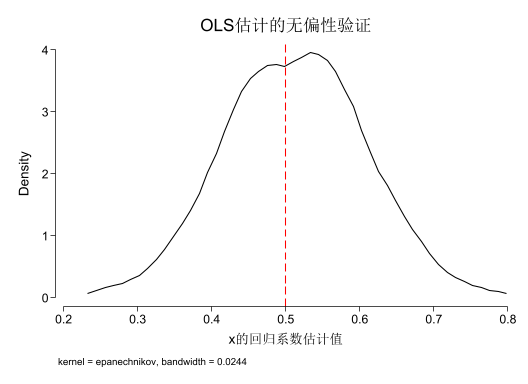

In [ ]:

* 读取所有模拟结果
use "$data/sim_data_unbias.dta", clear

* 1. 汇总统计：均值、标准差、最小值、最大值，5%、25%、50%、75%、95%
// summarize beta, detail  // 最快的方式，单输出结果不直观

*-方式二：使用 fsum 和 tabstat 输出结果表格
fsum beta, s(mean sd min max p5 p25 p50 p75 p95) format(%6.3f)
tabstat beta, statistics(mean sd min p5 p25 p50 p75 p95 max) format(%4.3f) c(v)

* 2. 绘制核密度图，并用红色虚线标注理论值β=0.5
kdensity beta,  ///
    title("OLS估计的无偏性验证") ///
    xtitle("x的回归系数估计值")  ///
    xlabel(0.2(0.1)0.8, format(%3.1f)) ///
    xline(0.5, lcolor(red) lpattern(dash)) 

graph export "$output/OLS_Unbiasedness.png", replace width(800) height(600)

结果简要分析：
​
- $\hat{\beta}$的均值为 0.5087，确实非常接近理论值 0.5，验证了 OLS 估计的无偏性。
- $\hat{\beta}$的分布以 0.5 为中心，50%分位数为 0.5039，说明大多数估计值都围绕理论值波动。
- $\hat{\beta}$的方差（标准差为 0.0919）反映了估计值的离散程度。理论上，样本量越大，方差越小。Step 3 进一步比较不同样本量下的方差变化，可验证这一结论。